In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime

In [60]:

# Chemin vers le répertoire contenant les fichiers CSV
pathfile=r'data_anonymous'

# reflist: list of epc in each box
# Initialisation du DataFrame reflist
reflist=pd.DataFrame()
#
# Liste des fichiers dans le répertoire 
files=os.listdir(pathfile)

# Parcourir chaque fichier dans le répertoire
for file in files:
    print(file)
    # Vérifier si le fichier commence par 'reflist_'
    if file.startswith('reflist_'):
        # Lire le fichier CSV et extraire la colonne 'Epc'
        temp=pd.read_csv(os.path.join(pathfile,file),sep=',').reset_index(drop=True)[['Epc']]
        # Ajouter une colonne 'refListId' avec le nom de fichier
        temp['refListId']=file.split('.')[0]
        #reflist=reflist.append(temp)
        # Concaténer temp avec reflist
        reflist = pd.concat([reflist, temp])

# Renommer la colonne 'refListId' en 'refListId_actual' 
reflist=reflist.rename(columns={'refListId':'refListId_actual'})

# Extraire les chiffres de la colonne 'refListId_actual' et les convertir en entiers
reflist['refListId_actual']=reflist['refListId_actual'].apply(lambda x:int(x[8:]))

# Calculer le nombre d'éléments uniques dans 'Epc' pour chaque 'refListId_actual'
Q_refListId_actual=reflist.groupby('refListId_actual')['Epc'].nunique().rename('Q refListId_actual').reset_index(drop=False)

# Fusionner reflist avec Q_refListId_actual sur 'refListId_actual' en utilisant une jointure gauche
reflist=pd.merge(reflist,Q_refListId_actual,on='refListId_actual',how='left')
reflist

ano_APTags-TagsAutomatedProcess-2019-11-07-16_29_46.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-16_57_34.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-17_16_18.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-17_32_19.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-17_58_50.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-18_13_30.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-18_21_44.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-18_30_01.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-18_38_19.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-18_49_44.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-19_00_26.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-19_10_51.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-19_20_14.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-19_29_54.csv
ano_APTags-TagsAutomatedProcess-2019-11-08-10_55_25.csv
ano_supply-process.2019-11-07-CUT.csv
reflist_0.olpn
reflist_1.olpn
reflist_2.olpn
reflist_3.olpn
reflist_4.olpn
reflist_5.olpn
reflist_6.olpn
reflist_7.olpn
re

,Epc,refListId_actual,Q refListId_actual
0,epc_90,0,16
1,epc_91,0,16
2,epc_92,0,16
3,epc_93,0,16
4,epc_94,0,16
...,...,...,...
197,epc_133,9,8
198,epc_134,9,8
199,epc_135,9,8
200,epc_136,9,8


In [61]:
# pathfile=r'data_anonymous'
# 
# df : rfid readings
# Création d'un DataFrame vide pour stocker les lectures RFID
df=pd.DataFrame()
# 
# Parcours des fichiers CSV dans le répertoire spécifié
files=os.listdir(pathfile)
for file in files:
    print(file)
    if file.startswith('ano_APTags'):
        # Lecture des données du fichier CSV
        temp=pd.read_csv(os.path.join(pathfile,file),sep=',')
        
        #df=df.append(temp)
        # Ajout des données au DataFrame principal
        df = pd.concat([df, temp]) 
# Conversion des types de données
df['LogTime']=pd.to_datetime (df['LogTime'] ,format='%Y-%m-%d-%H:%M:%S') 
df['TimeStamp']=df['TimeStamp'].astype(float)
df['Rssi']=df['Rssi'].astype(float)

# Suppression des colonnes inutiles
df=df.drop(['Reader','EmitPower','Frequency'],axis=1).reset_index(drop=True)

# Réorganisation des colonnes
df=df[['LogTime', 'Epc', 'Rssi', 'Ant']]
# antennas 1 and 2 are facing the box when photocell in/out 
# Association des antennes avec leur emplacement
Ant_loc=pd.DataFrame({'Ant':[1,2,3,4],'loc':['in','in','out','out']})
df=pd.merge(df,Ant_loc,on=['Ant'])

# Tri des données par 'LogTime'
df=df.sort_values('LogTime').reset_index(drop=True)

ano_APTags-TagsAutomatedProcess-2019-11-07-16_29_46.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-16_57_34.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-17_16_18.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-17_32_19.csv


ano_APTags-TagsAutomatedProcess-2019-11-07-17_58_50.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-18_13_30.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-18_21_44.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-18_30_01.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-18_38_19.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-18_49_44.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-19_00_26.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-19_10_51.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-19_20_14.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-19_29_54.csv
ano_APTags-TagsAutomatedProcess-2019-11-08-10_55_25.csv
ano_supply-process.2019-11-07-CUT.csv
reflist_0.olpn
reflist_1.olpn
reflist_2.olpn
reflist_3.olpn
reflist_4.olpn
reflist_5.olpn
reflist_6.olpn
reflist_7.olpn
reflist_8.olpn
reflist_9.olpn


In [62]:
# Attribution du DataFrame df à la variable tags
tags=df

# Affichage des cinq premières lignes de tags
tags.head()

,LogTime,Epc,Rssi,Ant,loc
0,2019-11-07 15:32:10,epc_100,-69.0,3,out
1,2019-11-07 15:32:10,epc_97,-69.0,3,out
2,2019-11-07 15:32:10,epc_97,-65.0,3,out
3,2019-11-07 15:32:10,epc_99,-70.0,3,out
4,2019-11-07 15:32:10,epc_100,-66.0,3,out


In [63]:
# Renvoie le nombre total de lignes dans le DataFrame tags
len(tags)

1204003

In [64]:
# timing: photocells a time window for each box: start/stop (ciuchStart, ciuchStop)
file=r'ano_supply-process.2019-11-07-CUT.csv'

# Lecture du fichier CSV et stockage des données dans un DataFrame
timing=pd.read_csv(os.path.join(pathfile,file),sep=',')

# Ajout des informations de fichier
timing['file']=file

# Conversion des colonnes de date en objets datetime
timing['date']=pd.to_datetime(timing['date'],format='%d/%m/%Y %H:%M:%S,%f')
timing['ciuchStart']=pd.to_datetime(timing['ciuchStart'],format='%d/%m/%Y %H:%M:%S,%f')
timing['ciuchStop']=pd.to_datetime(timing['ciuchStop'],format='%d/%m/%Y %H:%M:%S,%f')

# Conversion des colonnes timestamp en type float
timing['timestampStart']=timing['timestampStart'].astype(float)
timing['timestampStop']=timing['timestampStop'].astype(float)

# Tri des données par date
timing=timing.sort_values('date')

# Extraction du numéro de liste de référence en supprimant les premiers caractères
timing.loc[:,'refListId']=timing.loc[:,'refListId'].apply(lambda x:int(x[8:]))

# Sélection des colonnes pertinentes pour l'analyse
timing=timing[['refListId', 'ciuchStart', 'ciuchStop']]

timing[:1]

,refListId,ciuchStart,ciuchStop
0,0,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197


In [65]:
# Renvoie le nombre total de lignes dans le DataFrame timing
len(timing)

389

In [66]:
timing

,refListId,ciuchStart,ciuchStop
0,0,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197
1,1,2019-11-07 18:54:02.637,2019-11-07 18:54:04.463
2,2,2019-11-07 18:54:13.587,2019-11-07 18:54:15.447
3,3,2019-11-07 18:54:17.942,2019-11-07 18:54:19.591
4,4,2019-11-07 18:54:23.683,2019-11-07 18:54:25.528
...,...,...,...
384,7,2019-11-07 19:34:22.740,2019-11-07 19:34:24.686
385,8,2019-11-07 19:34:27.950,2019-11-07 19:34:29.670
386,9,2019-11-07 19:34:33.696,2019-11-07 19:34:35.671
387,0,2019-11-07 19:34:39.687,2019-11-07 19:34:41.624


In [67]:
# ciuchStart_up starts upstream ciuchStart, half way in between the previous stop and the actual start
# ciuchStart_up commence en amont de ciuchStart, à mi-chemin entre l'arrêt précédent et le démarrage actuel
timing[['ciuchStop_last']]=timing[['ciuchStop']].shift(1)
timing[['refListId_last']]=timing[['refListId']].shift(1)

# Calcul de la nouvelle colonne 'ciuchStartup' en décalant la valeur de 'ciuchStop' et en prenant la moyenne entre 'ciuchStop_last' et 'ciuchStart'
timing['ciuchStartup']=timing['ciuchStart'] - (timing['ciuchStart'] - timing['ciuchStop_last'])/2

# timing start: 10sec before timing
# Définition de l'heure de démarrage comme étant 10 secondes avant l'heure de début
timing.loc[0,'refListId_last']=timing.loc[0,'refListId']
timing.loc[0,'ciuchStartup']=timing.loc[0,'ciuchStart']-datetime.timedelta(seconds=10)
timing.loc[0,'ciuchStop_last']=timing.loc[0,'ciuchStartup']-datetime.timedelta(seconds=10)
timing['refListId_last']=timing['refListId_last'].astype(int)
# 
# Calcul de l'heure d'arrêt descendante comme étant la suivante 'ciuchStartup'
timing['ciuchStopdown']= timing['ciuchStartup'].shift(-1)
timing.loc[len(timing)-1,'ciuchStopdown']=timing.loc[len(timing)-1,'ciuchStop']+datetime.timedelta(seconds=10)

# Sélection des colonnes pertinentes
timing=timing[['refListId', 'refListId_last','ciuchStartup', 'ciuchStart','ciuchStop','ciuchStopdown']]
timing.head()

,refListId,refListId_last,ciuchStartup,ciuchStart,ciuchStop,ciuchStopdown
0,0,0,2019-11-07 18:53:42.370000,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.417000
1,1,0,2019-11-07 18:53:58.417000,2019-11-07 18:54:02.637,2019-11-07 18:54:04.463,2019-11-07 18:54:09.025000
2,2,1,2019-11-07 18:54:09.025000,2019-11-07 18:54:13.587,2019-11-07 18:54:15.447,2019-11-07 18:54:16.694500
3,3,2,2019-11-07 18:54:16.694500,2019-11-07 18:54:17.942,2019-11-07 18:54:19.591,2019-11-07 18:54:21.637000
4,4,3,2019-11-07 18:54:21.637000,2019-11-07 18:54:23.683,2019-11-07 18:54:25.528,2019-11-07 18:54:27.475000


In [68]:
# box 0 always starts
timing[timing['refListId']==0].head()

,refListId,refListId_last,ciuchStartup,ciuchStart,ciuchStop,ciuchStopdown
0,0,0,2019-11-07 18:53:42.370000,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.417000
10,0,9,2019-11-07 18:54:55.894500,2019-11-07 18:54:57.738,2019-11-07 18:54:59.584,2019-11-07 18:55:01.765000
20,0,9,2019-11-07 18:55:53.460500,2019-11-07 18:55:55.497,2019-11-07 18:55:57.377,2019-11-07 18:55:59.567500
30,0,9,2019-11-07 18:56:51.317000,2019-11-07 18:56:53.344,2019-11-07 18:56:55.215,2019-11-07 18:56:57.241500
40,0,9,2019-11-07 18:58:02.390500,2019-11-07 18:58:04.351,2019-11-07 18:58:06.212,2019-11-07 18:58:11.428000


In [69]:
# t0_run = a new run starts when box 0 shows up
# Sélection des lignes où 'refListId' est égal à 0, puis sélection de la colonne 'ciuchStartup'
t0_run=timing[timing['refListId']==0] [['ciuchStartup']]

# Renommer la colonne pour plus de clarté
t0_run=t0_run.rename(columns={'ciuchStartup':'t0_run'})

# Comptage cumulatif du nombre de départs (runs) à partir de la première occurrence de t0_run
t0_run=t0_run.groupby('t0_run').size().cumsum().rename('run').reset_index(drop=False)

# Tri des données par 't0_run' (début de chaque exécution)
t0_run=t0_run.sort_values('t0_run')
# 
# each row in timing is merged with a last row in t0_run where t0_run (ciuchstart) <= timing (ciuchstart)
# Fusion de chaque ligne dans timing avec la dernière ligne dans t0_run où t0_run (ciuchstart) <= timing (ciuchstart)
timing=pd.merge_asof(timing,t0_run,left_on='ciuchStartup',right_on='t0_run', direction='backward')

# Tri des données par 'ciuchStop'
timing=timing.sort_values('ciuchStop')

# Sélection des colonnes pertinentes pour l'analyse
timing=timing[['run', 'refListId', 'refListId_last', 'ciuchStartup','ciuchStart','ciuchStop','ciuchStopdown','t0_run']]
timing.head()

,run,refListId,refListId_last,ciuchStartup,ciuchStart,ciuchStop,ciuchStopdown,t0_run
0,1,0,0,2019-11-07 18:53:42.370000,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.417000,2019-11-07 18:53:42.370
1,1,1,0,2019-11-07 18:53:58.417000,2019-11-07 18:54:02.637,2019-11-07 18:54:04.463,2019-11-07 18:54:09.025000,2019-11-07 18:53:42.370
2,1,2,1,2019-11-07 18:54:09.025000,2019-11-07 18:54:13.587,2019-11-07 18:54:15.447,2019-11-07 18:54:16.694500,2019-11-07 18:53:42.370
3,1,3,2,2019-11-07 18:54:16.694500,2019-11-07 18:54:17.942,2019-11-07 18:54:19.591,2019-11-07 18:54:21.637000,2019-11-07 18:53:42.370
4,1,4,3,2019-11-07 18:54:21.637000,2019-11-07 18:54:23.683,2019-11-07 18:54:25.528,2019-11-07 18:54:27.475000,2019-11-07 18:53:42.370


In [70]:
timing[:12]

,run,refListId,refListId_last,ciuchStartup,ciuchStart,ciuchStop,ciuchStopdown,t0_run
0,1,0,0,2019-11-07 18:53:42.370000,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.417000,2019-11-07 18:53:42.370000
1,1,1,0,2019-11-07 18:53:58.417000,2019-11-07 18:54:02.637,2019-11-07 18:54:04.463,2019-11-07 18:54:09.025000,2019-11-07 18:53:42.370000
2,1,2,1,2019-11-07 18:54:09.025000,2019-11-07 18:54:13.587,2019-11-07 18:54:15.447,2019-11-07 18:54:16.694500,2019-11-07 18:53:42.370000
3,1,3,2,2019-11-07 18:54:16.694500,2019-11-07 18:54:17.942,2019-11-07 18:54:19.591,2019-11-07 18:54:21.637000,2019-11-07 18:53:42.370000
4,1,4,3,2019-11-07 18:54:21.637000,2019-11-07 18:54:23.683,2019-11-07 18:54:25.528,2019-11-07 18:54:27.475000,2019-11-07 18:53:42.370000
5,1,5,4,2019-11-07 18:54:27.475000,2019-11-07 18:54:29.422,2019-11-07 18:54:31.278,2019-11-07 18:54:33.115500,2019-11-07 18:53:42.370000
6,1,6,5,2019-11-07 18:54:33.115500,2019-11-07 18:54:34.953,2019-11-07 18:54:36.685,2019-11-07 18:54:38.757000,2019-11-07 18:53:42.370000
7,1,7,6,2019-11-07 18:54:38.757000,2019-11-07 18:54:40.829,2019-11-07 18:54:42.611,2019-11-07 18:54:44.497000,2019-11-07 18:53:42.370000
8,1,8,7,2019-11-07 18:54:44.497000,2019-11-07 18:54:46.383,2019-11-07 18:54:48.158,2019-11-07 18:54:50.140000,2019-11-07 18:53:42.370000
9,1,9,8,2019-11-07 18:54:50.140000,2019-11-07 18:54:52.122,2019-11-07 18:54:54.051,2019-11-07 18:54:55.894500,2019-11-07 18:53:42.370000


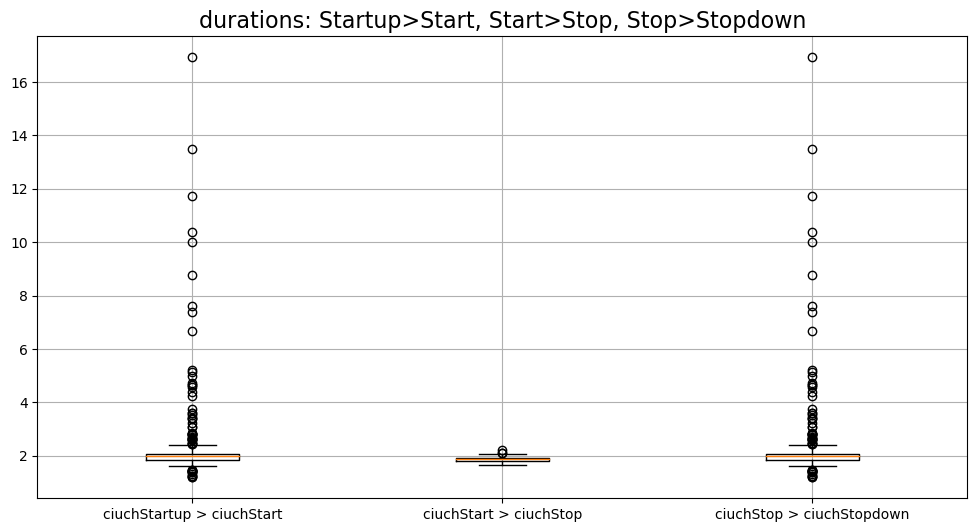

In [71]:
plt.figure(figsize=(12,6))
up=(timing['ciuchStart']-timing['ciuchStartup']).apply(lambda x:x.total_seconds())
mid=(timing['ciuchStop']-timing['ciuchStart']).apply(lambda x:x.total_seconds())
down=(timing['ciuchStopdown']-timing['ciuchStop']).apply(lambda x:x.total_seconds())
plt.boxplot([up,mid,down],labels=['ciuchStartup > ciuchStart','ciuchStart > ciuchStop','ciuchStop > ciuchStopdown'])
plt.grid()
plt.title('durations: Startup>Start, Start>Stop, Stop>Stopdown',size=16)
plt.show()

In [72]:
#  full window (ciuchStartup > ciuchStopdown) is sliced in smaller slices
# ciuchStartup > ciuchStart: 11 slices named up_0, up_1, ..., up_10
# ciuchStart > ciuchStop: 11 slices named mid_0, mid_1, ... mid_10
# ciuchStop > ciuchStopdown: 11 slices names down_0, down_1, ... down_10

# Création d'un DataFrame pour stocker les tranches de temps
slices=pd.DataFrame()

# Boucle sur chaque ligne dans le DataFrame 'timing'
for i, row in timing .iterrows():
    ciuchStartup=row['ciuchStartup']
    ciuchStart=row['ciuchStart']
    ciuchStop=row['ciuchStop']
    ciuchStopdown=row['ciuchStopdown']
    steps=4 # Nombre de tranches par intervalle de temps

#   # Création de tranches pour l'intervalle entre 'ciuchStartup' et 'ciuchStart'  
    up=pd.DataFrame(index=pd.date_range(start=ciuchStartup, end=ciuchStart,periods=steps,inclusive='left'))\
        .reset_index(drop=False).rename(columns={'index':'slice'})
    up.index=['up_'+str(x) for x in range(steps-1)]
    #slices=slices.append(up)
    slices=pd.concat([slices, up])

#   # Création de tranches pour l'intervalle entre 'ciuchStart' et 'ciuchStop'
    mid=pd.DataFrame(index=pd.date_range(start=ciuchStart, end=ciuchStop,periods=steps,inclusive='left'))\
        .reset_index(drop=False).rename(columns={'index':'slice'})
    mid.index=['mid_'+str(x) for x in range(steps-1)]
    #slices=slices.append(mid)
    slices=pd.concat([slices, mid])

#   # Création de tranches pour l'intervalle entre 'ciuchStop' et 'ciuchStopdown'     
    down=pd.DataFrame(index=pd.date_range(start=ciuchStop, end=ciuchStopdown,periods=steps,inclusive='left'))\
        .reset_index(drop=False).rename(columns={'index':'slice'})
    down.index=['down_'+str(x) for x in range(steps-1)]
    slices=pd.concat([slices, down])
#     slices=slices.append(up)

# Réinitialisation de l'index du DataFrame 'slices'
slices=slices.reset_index(drop=False).rename(columns={'index':'slice_id'})

## Fusion des tranches avec les données de timing en utilisant 'ciuchStartup' comme point de référence
timing_slices=pd.merge_asof(slices,timing,left_on='slice',right_on='ciuchStartup',direction='backward')

# Sélection des colonnes pertinentes pour l'analyse
timing_slices=timing_slices[['run', 'refListId', 'refListId_last','slice_id','slice',  \
                             'ciuchStartup', 'ciuchStart', 'ciuchStop', 'ciuchStopdown','t0_run']]
timing_slices.head()

,run,refListId,refListId_last,slice_id,slice,ciuchStartup,ciuchStart,ciuchStop,ciuchStopdown,t0_run
0,1,0,0,up_0,2019-11-07 18:53:42.370000000,2019-11-07 18:53:42.370,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.417,2019-11-07 18:53:42.370
1,1,0,0,up_1,2019-11-07 18:53:45.703333333,2019-11-07 18:53:42.370,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.417,2019-11-07 18:53:42.370
2,1,0,0,up_2,2019-11-07 18:53:49.036666666,2019-11-07 18:53:42.370,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.417,2019-11-07 18:53:42.370
3,1,0,0,mid_0,2019-11-07 18:53:52.370000000,2019-11-07 18:53:42.370,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.417,2019-11-07 18:53:42.370
4,1,0,0,mid_1,2019-11-07 18:53:52.979000000,2019-11-07 18:53:42.370,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.417,2019-11-07 18:53:42.370


In [73]:
len(timing_slices)

3501

In [74]:
# merge between df and timing
# merge_asof needs sorted df > df_ref
df=df[ (df['LogTime']>=timing['ciuchStartup'].min()) & (df['LogTime']<=timing['ciuchStopdown'].max())  ]
df=df.sort_values('LogTime')
# 
# each row in df_ref is merged with the last row in timing where timing (ciuchstart_up) < df_ref (logtime)
# 
# df_timing=pd.merge_asof(df_ref,timing,left_on=['LogTime'],right_on=['ciuchStartup'],direction='backward')
# df_timing=df_timing.dropna()
# df_timing=df_timing.sort_values('LogTime').reset_index(drop=True)
# df_timing=df_timing[['run', 'Epc','refListId', 'refListId_last', 'ciuchStartup',\
#                      'LogTime', 'ciuchStop', 'ciuchStopdown','Rssi', 'loc', 'refListId_actual']]
# 
# each row in df_ref is merged with the last row in timing_slices where timing (slice) < df_ref (logtime)
# 
df_timing_slices=pd.merge_asof(df,timing_slices,left_on=['LogTime'],right_on=['slice'],direction='backward')
df_timing_slices=df_timing_slices.dropna()
df_timing_slices=df_timing_slices.sort_values('slice').reset_index(drop=True)
df_timing_slices=df_timing_slices[['run', 'Epc','refListId', 'refListId_last', 'ciuchStartup','slice_id','slice','LogTime', \
                      'ciuchStart','ciuchStop', 'ciuchStopdown', 'Rssi', 'loc','t0_run']]

df_timing_slices

,run,Epc,refListId,refListId_last,ciuchStartup,slice_id,slice,LogTime,ciuchStart,ciuchStop,ciuchStopdown,Rssi,loc,t0_run
0,1,epc_131,0,0,2019-11-07 18:53:42.370,up_0,2019-11-07 18:53:42.370000000,2019-11-07 18:53:43,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.417,-62.0,out,2019-11-07 18:53:42.370
1,1,epc_133,0,0,2019-11-07 18:53:42.370,up_0,2019-11-07 18:53:42.370000000,2019-11-07 18:53:45,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.417,-67.0,in,2019-11-07 18:53:42.370
2,1,epc_131,0,0,2019-11-07 18:53:42.370,up_0,2019-11-07 18:53:42.370000000,2019-11-07 18:53:45,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.417,-69.0,in,2019-11-07 18:53:42.370
3,1,epc_133,0,0,2019-11-07 18:53:42.370,up_0,2019-11-07 18:53:42.370000000,2019-11-07 18:53:45,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.417,-67.0,out,2019-11-07 18:53:42.370
4,1,epc_175,0,0,2019-11-07 18:53:42.370,up_0,2019-11-07 18:53:42.370000000,2019-11-07 18:53:45,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.417,-65.0,out,2019-11-07 18:53:42.370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356063,40,epc_162,1,0,2019-11-07 19:34:44.230,down_2,2019-11-07 19:34:55.305666666,2019-11-07 19:34:57,2019-11-07 19:34:46.836,2019-11-07 19:34:48.639,2019-11-07 19:34:58.639,-67.0,out,2019-11-07 19:34:37.679
356064,40,epc_187,1,0,2019-11-07 19:34:44.230,down_2,2019-11-07 19:34:55.305666666,2019-11-07 19:34:57,2019-11-07 19:34:46.836,2019-11-07 19:34:48.639,2019-11-07 19:34:58.639,-65.0,out,2019-11-07 19:34:37.679
356065,40,epc_87,1,0,2019-11-07 19:34:44.230,down_2,2019-11-07 19:34:55.305666666,2019-11-07 19:34:57,2019-11-07 19:34:46.836,2019-11-07 19:34:48.639,2019-11-07 19:34:58.639,-69.0,out,2019-11-07 19:34:37.679
356066,40,epc_188,1,0,2019-11-07 19:34:44.230,down_2,2019-11-07 19:34:55.305666666,2019-11-07 19:34:57,2019-11-07 19:34:46.836,2019-11-07 19:34:48.639,2019-11-07 19:34:58.639,-59.0,out,2019-11-07 19:34:37.679


In [75]:
# 

In [76]:
# df_timing_slices=pd.merge(df_timing_slices, reflist, on='Epc',how='left')
# df_timing_slices = df_timing_slices [ ~((df_timing_slices['refListId']==0) & (df_timing_slices['refListId_actual']==9)) ]
# # 
# df_timing_slices = df_timing_slices [ ~((df_timing_slices['refListId']==9) & (df_timing_slices['refListId_actual']==0)) ]
# # # 
# # df_timing_slices = df_timing_slices [ ~((df_timing_slices['refListId']==0) | (df_timing_slices['refListId_actual']==0)) ]

# df_timing_slices=df_timing_slices.drop(['refListId_actual','Q refListId_actual'],axis=1)

In [77]:
runs_out=df_timing_slices .groupby('run')['refListId'].nunique().rename('Q refListId').reset_index(drop=False)
runs_out[runs_out['Q refListId']!=10]

,run,Q refListId
15,16,9
22,23,9
31,32,9
39,40,2


In [78]:
current_last_windows=timing_slices.drop_duplicates(['run','refListId','refListId_last'])
current_last_windows=current_last_windows[['run','refListId','refListId_last','ciuchStop']].reset_index(drop=True)
current_last_windows[:1]

,run,refListId,refListId_last,ciuchStop
0,1,0,0,2019-11-07 18:53:54.197


In [79]:
# runs 16 23 32 40 have missing boxes: discarded
# also run 1 is the start, no previous box: discarded
# run 18: box 0 run at the end
# 
timing=timing[~timing['run'].isin([1,18,16,23,32,40])]
timing_slices=timing_slices[~timing_slices['run'].isin([1,18,16,23,32,40])]
df_timing_slices=df_timing_slices[~df_timing_slices['run'].isin([1,18,16,23,32,40])]

df_timing_slices=df_timing_slices.sort_values(['LogTime','Epc'])
# 

In [80]:
len(timing),len(timing_slices), len(df_timing_slices)

(340, 3060, 307965)

In [81]:
df_timing_slices[:1]

,run,Epc,refListId,refListId_last,ciuchStartup,slice_id,slice,LogTime,ciuchStart,ciuchStop,ciuchStopdown,Rssi,loc,t0_run
8970,2,epc_100,0,9,2019-11-07 18:54:55.894500,up_0,2019-11-07 18:54:55.894500,2019-11-07 18:54:56,2019-11-07 18:54:57.738,2019-11-07 18:54:59.584,2019-11-07 18:55:01.765,-68.0,in,2019-11-07 18:54:55.894500


In [82]:
# df_timing_slices['dt']=
df_timing_slices['dt']=(df_timing_slices['LogTime']-df_timing_slices['t0_run']).apply(lambda x:x.total_seconds())

In [83]:
df_timing_slices[:1]

,run,Epc,refListId,refListId_last,ciuchStartup,slice_id,slice,LogTime,ciuchStart,ciuchStop,ciuchStopdown,Rssi,loc,t0_run,dt
8970,2,epc_100,0,9,2019-11-07 18:54:55.894500,up_0,2019-11-07 18:54:55.894500,2019-11-07 18:54:56,2019-11-07 18:54:57.738,2019-11-07 18:54:59.584,2019-11-07 18:55:01.765,-68.0,in,2019-11-07 18:54:55.894500,0.1055


In [ ]:
df_timing_slices.to_csv('df_timing_slices.csv',index=False)

In [84]:
df_timing_slices['reflist_run_id'] = df_timing_slices['refListId'].astype(str) +"_"+ df_timing_slices['run'].astype(str)

In [85]:
df_timing_slices

,run,Epc,refListId,refListId_last,ciuchStartup,slice_id,slice,LogTime,ciuchStart,ciuchStop,ciuchStopdown,Rssi,loc,t0_run,dt,reflist_run_id
8970,2,epc_100,0,9,2019-11-07 18:54:55.894500,up_0,2019-11-07 18:54:55.894500000,2019-11-07 18:54:56,2019-11-07 18:54:57.738,2019-11-07 18:54:59.584,2019-11-07 18:55:01.765,-68.0,in,2019-11-07 18:54:55.894500,0.1055,0_2
8971,2,epc_100,0,9,2019-11-07 18:54:55.894500,up_0,2019-11-07 18:54:55.894500000,2019-11-07 18:54:56,2019-11-07 18:54:57.738,2019-11-07 18:54:59.584,2019-11-07 18:55:01.765,-47.0,out,2019-11-07 18:54:55.894500,0.1055,0_2
9003,2,epc_100,0,9,2019-11-07 18:54:55.894500,up_0,2019-11-07 18:54:55.894500000,2019-11-07 18:54:56,2019-11-07 18:54:57.738,2019-11-07 18:54:59.584,2019-11-07 18:55:01.765,-54.0,out,2019-11-07 18:54:55.894500,0.1055,0_2
9010,2,epc_100,0,9,2019-11-07 18:54:55.894500,up_0,2019-11-07 18:54:55.894500000,2019-11-07 18:54:56,2019-11-07 18:54:57.738,2019-11-07 18:54:59.584,2019-11-07 18:55:01.765,-50.0,out,2019-11-07 18:54:55.894500,0.1055,0_2
9082,2,epc_100,0,9,2019-11-07 18:54:55.894500,up_0,2019-11-07 18:54:55.894500000,2019-11-07 18:54:56,2019-11-07 18:54:57.738,2019-11-07 18:54:59.584,2019-11-07 18:55:01.765,-69.0,in,2019-11-07 18:54:55.894500,0.1055,0_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354254,39,epc_99,9,8,2019-11-07 19:34:31.683000,down_1,2019-11-07 19:34:36.340333333,2019-11-07 19:34:37,2019-11-07 19:34:33.696,2019-11-07 19:34:35.671,2019-11-07 19:34:37.679,-62.0,in,2019-11-07 19:33:38.447500,58.5525,9_39
354277,39,epc_99,9,8,2019-11-07 19:34:31.683000,down_1,2019-11-07 19:34:36.340333333,2019-11-07 19:34:37,2019-11-07 19:34:33.696,2019-11-07 19:34:35.671,2019-11-07 19:34:37.679,-51.0,out,2019-11-07 19:33:38.447500,58.5525,9_39
354305,39,epc_99,9,8,2019-11-07 19:34:31.683000,down_1,2019-11-07 19:34:36.340333333,2019-11-07 19:34:37,2019-11-07 19:34:33.696,2019-11-07 19:34:35.671,2019-11-07 19:34:37.679,-62.0,in,2019-11-07 19:33:38.447500,58.5525,9_39
354353,39,epc_99,9,8,2019-11-07 19:34:31.683000,down_1,2019-11-07 19:34:36.340333333,2019-11-07 19:34:37,2019-11-07 19:34:33.696,2019-11-07 19:34:35.671,2019-11-07 19:34:37.679,-49.0,out,2019-11-07 19:33:38.447500,58.5525,9_39


In [86]:
# 
# df_timing_threshold
# 

In [87]:
rssi_threshold=-110
df_timing_slices_threshold=df_timing_slices[df_timing_slices['Rssi']>rssi_threshold]

In [88]:
# readrate
# readrate
round(100*df_timing_slices_threshold.reset_index(drop=False).groupby(['run','loc'])['Epc'].nunique().groupby('loc').mean()\
    /reflist['Epc'].nunique(),2)

loc
in     100.00
out     99.29
Name: Epc, dtype: float64

In [89]:
df_timing_slices

,run,Epc,refListId,refListId_last,ciuchStartup,slice_id,slice,LogTime,ciuchStart,ciuchStop,ciuchStopdown,Rssi,loc,t0_run,dt,reflist_run_id
8970,2,epc_100,0,9,2019-11-07 18:54:55.894500,up_0,2019-11-07 18:54:55.894500000,2019-11-07 18:54:56,2019-11-07 18:54:57.738,2019-11-07 18:54:59.584,2019-11-07 18:55:01.765,-68.0,in,2019-11-07 18:54:55.894500,0.1055,0_2
8971,2,epc_100,0,9,2019-11-07 18:54:55.894500,up_0,2019-11-07 18:54:55.894500000,2019-11-07 18:54:56,2019-11-07 18:54:57.738,2019-11-07 18:54:59.584,2019-11-07 18:55:01.765,-47.0,out,2019-11-07 18:54:55.894500,0.1055,0_2
9003,2,epc_100,0,9,2019-11-07 18:54:55.894500,up_0,2019-11-07 18:54:55.894500000,2019-11-07 18:54:56,2019-11-07 18:54:57.738,2019-11-07 18:54:59.584,2019-11-07 18:55:01.765,-54.0,out,2019-11-07 18:54:55.894500,0.1055,0_2
9010,2,epc_100,0,9,2019-11-07 18:54:55.894500,up_0,2019-11-07 18:54:55.894500000,2019-11-07 18:54:56,2019-11-07 18:54:57.738,2019-11-07 18:54:59.584,2019-11-07 18:55:01.765,-50.0,out,2019-11-07 18:54:55.894500,0.1055,0_2
9082,2,epc_100,0,9,2019-11-07 18:54:55.894500,up_0,2019-11-07 18:54:55.894500000,2019-11-07 18:54:56,2019-11-07 18:54:57.738,2019-11-07 18:54:59.584,2019-11-07 18:55:01.765,-69.0,in,2019-11-07 18:54:55.894500,0.1055,0_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354254,39,epc_99,9,8,2019-11-07 19:34:31.683000,down_1,2019-11-07 19:34:36.340333333,2019-11-07 19:34:37,2019-11-07 19:34:33.696,2019-11-07 19:34:35.671,2019-11-07 19:34:37.679,-62.0,in,2019-11-07 19:33:38.447500,58.5525,9_39
354277,39,epc_99,9,8,2019-11-07 19:34:31.683000,down_1,2019-11-07 19:34:36.340333333,2019-11-07 19:34:37,2019-11-07 19:34:33.696,2019-11-07 19:34:35.671,2019-11-07 19:34:37.679,-51.0,out,2019-11-07 19:33:38.447500,58.5525,9_39
354305,39,epc_99,9,8,2019-11-07 19:34:31.683000,down_1,2019-11-07 19:34:36.340333333,2019-11-07 19:34:37,2019-11-07 19:34:33.696,2019-11-07 19:34:35.671,2019-11-07 19:34:37.679,-62.0,in,2019-11-07 19:33:38.447500,58.5525,9_39
354353,39,epc_99,9,8,2019-11-07 19:34:31.683000,down_1,2019-11-07 19:34:36.340333333,2019-11-07 19:34:37,2019-11-07 19:34:33.696,2019-11-07 19:34:35.671,2019-11-07 19:34:37.679,-49.0,out,2019-11-07 19:33:38.447500,58.5525,9_39


# Implémentation de la méthode analytique

In [90]:
ana = df_timing_slices.groupby(['Epc' ,'slice_id', 'loc','reflist_run_id']) ['Rssi'].max()\
    .unstack('loc', fill_value =- 110).reset_index(drop=False)
ana

loc,Epc,slice_id,reflist_run_id,in,out
0,epc_0,down_0,0_10,-110.0,-67.0
1,epc_0,down_0,0_19,-110.0,-69.0
2,epc_0,down_0,0_27,-110.0,-69.0
3,epc_0,down_0,0_29,-110.0,-65.0
4,epc_0,down_0,0_30,-110.0,-65.0
...,...,...,...,...,...
82437,epc_99,up_2,9_29,-110.0,-56.0
82438,epc_99,up_2,9_3,-110.0,-52.0
82439,epc_99,up_2,9_30,-110.0,-49.0
82440,epc_99,up_2,9_33,-110.0,-53.0


In [91]:
order=pd.DataFrame(timing_slices['slice_id'].unique(), columns=['slice_id'])
order['order']=order. index
order



,slice_id,order
0,up_0,0
1,up_1,1
2,up_2,2
3,mid_0,3
4,mid_1,4
5,mid_2,5
6,down_0,6
7,down_1,7
8,down_2,8


In [92]:
ana=pd.merge(ana, order, on='slice_id', how='left')
ana = ana [['Epc','reflist_run_id','slice_id', 'in', 'out', 'order']]
ana

,Epc,reflist_run_id,slice_id,in,out,order
0,epc_0,0_10,down_0,-110.0,-67.0,6
1,epc_0,0_19,down_0,-110.0,-69.0,6
2,epc_0,0_27,down_0,-110.0,-69.0,6
3,epc_0,0_29,down_0,-110.0,-65.0,6
4,epc_0,0_30,down_0,-110.0,-65.0,6
...,...,...,...,...,...,...
82437,epc_99,9_29,up_2,-110.0,-56.0,2
82438,epc_99,9_3,up_2,-110.0,-52.0,2
82439,epc_99,9_30,up_2,-110.0,-49.0,2
82440,epc_99,9_33,up_2,-110.0,-53.0,2


In [93]:
# Last subslice_id with out>in
ana_out =ana [ ana['out']>ana['in'] ] \
.sort_values(['Epc', 'reflist_run_id', 'order'], ascending=False) \
.drop_duplicates(['Epc', 'reflist_run_id'])
# first subslice_id with in/out
ana_in =ana [ ana['in']>ana['out'] ] \
.sort_values(['Epc', 'reflist_run_id', 'order'], ascending=True) \
.drop_duplicates(['Epc', 'reflist_run_id'])


In [94]:
ana_in

,Epc,reflist_run_id,slice_id,in,out,order
385,epc_0,5_10,up_2,-51.0,-110.0,2
386,epc_0,5_11,up_2,-49.0,-69.0,2
387,epc_0,5_12,up_2,-56.0,-63.0,2
388,epc_0,5_13,up_2,-50.0,-110.0,2
171,epc_0,5_14,mid_0,-51.0,-110.0,3
...,...,...,...,...,...,...
82275,epc_99,1_6,up_0,-61.0,-110.0,0
82344,epc_99,1_7,up_1,-63.0,-110.0,1
82276,epc_99,1_8,up_0,-62.0,-110.0,0
82345,epc_99,1_9,up_1,-62.0,-110.0,1


In [95]:
ana_out

,Epc,reflist_run_id,slice_id,in,out,order
82030,epc_99,9_9,down_2,-61.0,-48.0,8
82029,epc_99,9_8,down_2,-67.0,-44.0,8
82028,epc_99,9_7,down_2,-63.0,-47.0,8
82027,epc_99,9_6,down_2,-61.0,-47.0,8
82026,epc_99,9_5,down_2,-66.0,-50.0,8
...,...,...,...,...,...,...
3,epc_0,0_29,down_0,-110.0,-65.0,6
2,epc_0,0_27,down_0,-110.0,-69.0,6
52,epc_0,0_21,down_1,-110.0,-65.0,7
1,epc_0,0_19,down_0,-110.0,-69.0,6


In [96]:
ana = pd.merge(ana_in, ana_out, on=['Epc', 'reflist_run_id'], suffixes=['_IN', '_OUT'], how='inner')\
.sort_values(['Epc', 'reflist_run_id'])
ana = pd.merge(ana, reflist, on='Epc', how='left')

ana


,Epc,reflist_run_id,slice_id_IN,in_IN,out_IN,order_IN,slice_id_OUT,in_OUT,out_OUT,order_OUT,refListId_actual,Q refListId_actual
0,epc_0,5_10,up_2,-51.0,-110.0,2,up_0,-110.0,-47.0,0,5,40
1,epc_0,5_11,up_2,-49.0,-69.0,2,up_1,-63.0,-47.0,1,5,40
2,epc_0,5_12,up_2,-56.0,-63.0,2,up_0,-110.0,-46.0,0,5,40
3,epc_0,5_13,up_2,-50.0,-110.0,2,up_0,-64.0,-45.0,0,5,40
4,epc_0,5_14,mid_0,-51.0,-110.0,3,up_1,-67.0,-47.0,1,5,40
...,...,...,...,...,...,...,...,...,...,...,...,...
6521,epc_99,0_7,up_2,-51.0,-62.0,2,up_1,-55.0,-49.0,1,0,16
6522,epc_99,0_8,up_2,-52.0,-60.0,2,up_0,-61.0,-48.0,0,0,16
6523,epc_99,0_9,up_2,-44.0,-61.0,2,up_1,-59.0,-48.0,1,0,16
6524,epc_99,1_14,up_1,-62.0,-110.0,1,up_0,-63.0,-62.0,0,0,16


In [97]:
reflist

,Epc,refListId_actual,Q refListId_actual
0,epc_90,0,16
1,epc_91,0,16
2,epc_92,0,16
3,epc_93,0,16
4,epc_94,0,16
...,...,...,...
197,epc_133,9,8
198,epc_134,9,8
199,epc_135,9,8
200,epc_136,9,8


In [98]:
ana['pred_ana_bool']= ana['reflist_run_id'].apply(lambda x:x.split('_')[0]).astype('int64')== ana['refListId_actual']



In [99]:
ana

,Epc,reflist_run_id,slice_id_IN,in_IN,out_IN,order_IN,slice_id_OUT,in_OUT,out_OUT,order_OUT,refListId_actual,Q refListId_actual,pred_ana_bool
0,epc_0,5_10,up_2,-51.0,-110.0,2,up_0,-110.0,-47.0,0,5,40,True
1,epc_0,5_11,up_2,-49.0,-69.0,2,up_1,-63.0,-47.0,1,5,40,True
2,epc_0,5_12,up_2,-56.0,-63.0,2,up_0,-110.0,-46.0,0,5,40,True
3,epc_0,5_13,up_2,-50.0,-110.0,2,up_0,-64.0,-45.0,0,5,40,True
4,epc_0,5_14,mid_0,-51.0,-110.0,3,up_1,-67.0,-47.0,1,5,40,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6521,epc_99,0_7,up_2,-51.0,-62.0,2,up_1,-55.0,-49.0,1,0,16,True
6522,epc_99,0_8,up_2,-52.0,-60.0,2,up_0,-61.0,-48.0,0,0,16,True
6523,epc_99,0_9,up_2,-44.0,-61.0,2,up_1,-59.0,-48.0,1,0,16,True
6524,epc_99,1_14,up_1,-62.0,-110.0,1,up_0,-63.0,-62.0,0,0,16,False


In [117]:
anatest = ana

#anatest
# Tri du DataFrame ana par ordre croissant sur la colonne reflist_run_id
ana_sorted = anatest.sort_values(by='refListId_actual')


# Affichage du DataFrame trié
ana_sorted

# Exporter le DataFrame vers un fichier CSV
#ana_sorted.to_csv('Visualisation.csv', index=False)


,Epc,reflist_run_id,slice_id_IN,in_IN,out_IN,order_IN,slice_id_OUT,in_OUT,out_OUT,order_OUT,refListId_actual,Q refListId_actual,pred_ana_bool,Nombre de lectures
6525,epc_99,8_13,down_1,-72.0,-110.0,7,down_0,-110.0,-60.0,6,0,16,False,36
6363,epc_94,0_7,up_2,-50.0,-65.0,2,up_1,-60.0,-40.0,1,0,16,True,34
6364,epc_94,0_8,mid_0,-42.0,-62.0,3,up_0,-68.0,-36.0,0,0,16,True,34
6365,epc_94,0_9,up_2,-42.0,-63.0,2,up_1,-61.0,-39.0,1,0,16,True,34
6366,epc_95,0_10,mid_0,-59.0,-110.0,3,up_2,-69.0,-63.0,2,0,16,True,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,epc_137,9_19,mid_1,-52.0,-110.0,4,up_2,-110.0,-53.0,2,9,8,True,34
1423,epc_137,9_17,mid_0,-60.0,-66.0,3,up_1,-72.0,-44.0,1,9,8,True,34
1422,epc_137,9_15,mid_1,-52.0,-110.0,4,up_2,-62.0,-55.0,2,9,8,True,34
1431,epc_137,9_26,mid_1,-53.0,-110.0,4,up_2,-62.0,-58.0,2,9,8,True,34


In [127]:
epc_by_box = ana.groupby('reflist_run_id')['Epc'].agg(lambda x: ', '.join(x)).reset_index()

epc_by_box


,reflist_run_id,Epc
0,0_10,"epc_100, epc_101, epc_102, epc_104, epc_105, e..."
1,0_11,"epc_100, epc_101, epc_102, epc_104, epc_105, e..."
2,0_12,"epc_100, epc_101, epc_102, epc_103, epc_104, e..."
3,0_13,"epc_100, epc_101, epc_102, epc_104, epc_105, e..."
4,0_14,"epc_100, epc_101, epc_102, epc_104, epc_105, e..."
...,...,...
334,9_5,"epc_130, epc_131, epc_132, epc_133, epc_134, e..."
335,9_6,"epc_130, epc_131, epc_132, epc_133, epc_134, e..."
336,9_7,"epc_130, epc_131, epc_132, epc_133, epc_134, e..."
337,9_8,"epc_130, epc_131, epc_132, epc_133, epc_134, e..."


In [128]:
# Groupement des données par reflist_run_id et refListId_actual et comptage du nombre d'EPC bien classés
epc_count_per_run = ana[ana['pred_ana_bool'] == True].groupby(['reflist_run_id', 'refListId_actual'])['Epc'].count()

# Affichage du résultat
#print()
epc_count_per_run


reflist_run_id  refListId_actual
0_10            0                   15
0_11            0                   14
0_12            0                   16
0_13            0                   14
0_14            0                   15
                                    ..
9_5             9                    8
9_6             9                    7
9_7             9                    8
9_8             9                    7
9_9             9                    8
Name: Epc, Length: 339, dtype: int64

In [136]:
# Joindre les DataFrames
merged_df = pd.merge(epc_by_box, epc_count_per_run, on='reflist_run_id')

# Renommer les colonnes
merged_df.rename(columns={'Epc': 'Epc_groupés', 0: 'Nombre_EPC_bien_classés'}, inplace=True)

# Afficher le DataFrame résultant
merged_df[:68]
#merged_df.to_csv('bien_classe.csv',index=False)


,reflist_run_id,Epc_x,Epc_y
0,0_10,"epc_100, epc_101, epc_102, epc_104, epc_105, e...",15
1,0_11,"epc_100, epc_101, epc_102, epc_104, epc_105, e...",14
2,0_12,"epc_100, epc_101, epc_102, epc_103, epc_104, e...",16
3,0_13,"epc_100, epc_101, epc_102, epc_104, epc_105, e...",14
4,0_14,"epc_100, epc_101, epc_102, epc_104, epc_105, e...",15
...,...,...,...
63,1_5,"epc_138, epc_139, epc_140, epc_141, epc_142, e...",10
64,1_6,"epc_138, epc_139, epc_140, epc_141, epc_142, e...",10
65,1_7,"epc_138, epc_139, epc_141, epc_142, epc_143, e...",9
66,1_8,"epc_138, epc_139, epc_140, epc_141, epc_142, e...",10


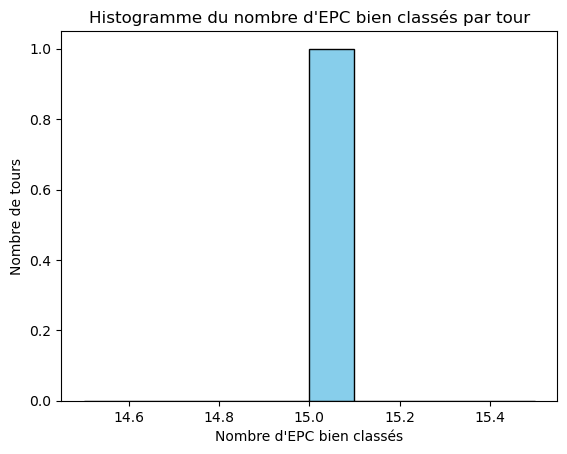

In [135]:
import matplotlib.pyplot as plt

# Créer un histogramme
plt.hist(epc_count_per_run[0], bins=10, color='skyblue', edgecolor='black')

# Ajouter des étiquettes et un titre
plt.xlabel('Nombre d\'EPC bien classés')
plt.ylabel('Nombre de tours')
plt.title('Histogramme du nombre d\'EPC bien classés par tour')

# Afficher l'histogramme
plt.show()


In [ ]:
# Compter le nombre de EPC bien classés par carton et par tour
result = ana[ana['pred_ana_bool'] == True].groupby(['reflist_run_id', 'slice_id_IN'])['epc'].count()

print(result)


In [104]:
ana.shape

(6526, 13)

In [105]:
anabelle=ana[ana['pred_ana_bool']==True]
anabelle.shape

(6331, 13)

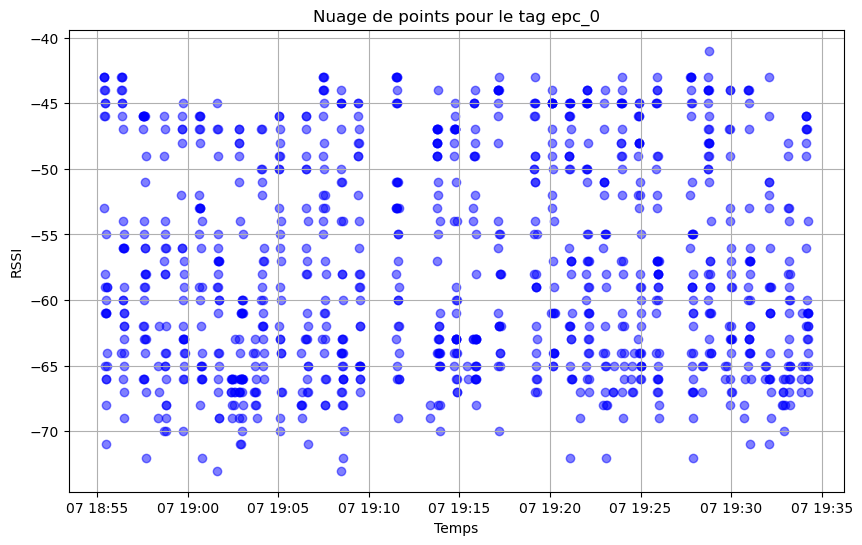

In [110]:
import matplotlib.pyplot as plt

# Filtrer les données pour un tag spécifique (remplacez 'epc_0' par le tag souhaité)
tag_data = df_timing_slices[df_timing_slices['Epc'] == 'epc_0']

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(tag_data['LogTime'], tag_data['Rssi'], color='blue', alpha=0.5)
plt.title('Nuage de points pour le tag epc_0')
plt.xlabel('Temps')
plt.ylabel('RSSI')
plt.grid(True)
plt.show()


In [111]:
nombre_lectures_par_tag = ana['Epc'].value_counts()
print(nombre_lectures_par_tag)


Epc
epc_201    44
epc_149    44
epc_156    40
epc_70     39
epc_189    38
           ..
epc_154    19
epc_103    18
epc_186    17
epc_29     14
epc_9       9
Name: count, Length: 202, dtype: int64


In [112]:
nombre_lectures_par_tag = ana['Epc'].value_counts().reset_index()
nombre_lectures_par_tag.columns = ['Epc', 'Nombre de lectures']
ana = pd.merge(ana, nombre_lectures_par_tag, on='Epc', how='left')

ana[:-1]

,Epc,reflist_run_id,slice_id_IN,in_IN,out_IN,order_IN,slice_id_OUT,in_OUT,out_OUT,order_OUT,refListId_actual,Q refListId_actual,pred_ana_bool,Nombre de lectures
0,epc_0,5_10,up_2,-51.0,-110.0,2,up_0,-110.0,-47.0,0,5,40,True,34
1,epc_0,5_11,up_2,-49.0,-69.0,2,up_1,-63.0,-47.0,1,5,40,True,34
2,epc_0,5_12,up_2,-56.0,-63.0,2,up_0,-110.0,-46.0,0,5,40,True,34
3,epc_0,5_13,up_2,-50.0,-110.0,2,up_0,-64.0,-45.0,0,5,40,True,34
4,epc_0,5_14,mid_0,-51.0,-110.0,3,up_1,-67.0,-47.0,1,5,40,True,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6520,epc_99,0_6,up_2,-50.0,-61.0,2,up_1,-66.0,-49.0,1,0,16,True,36
6521,epc_99,0_7,up_2,-51.0,-62.0,2,up_1,-55.0,-49.0,1,0,16,True,36
6522,epc_99,0_8,up_2,-52.0,-60.0,2,up_0,-61.0,-48.0,0,0,16,True,36
6523,epc_99,0_9,up_2,-44.0,-61.0,2,up_1,-59.0,-48.0,1,0,16,True,36


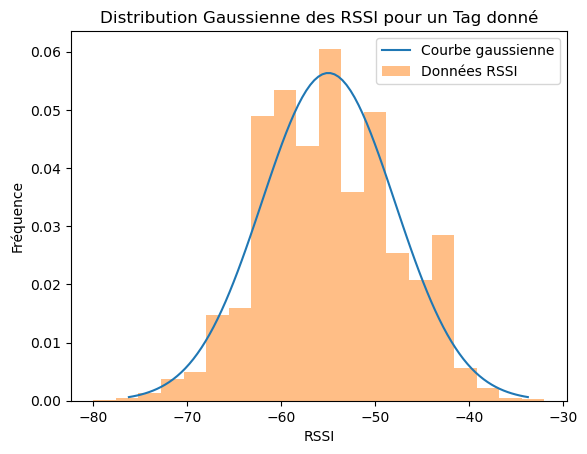

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Données RSSI pour un tag donné
donnees_rssi = ana['in_IN']  # ou toute autre colonne de données RSSI appropriée

# Calcul de la moyenne et de l'écart type des données RSSI
moyenne_rssi = donnees_rssi.mean()
ecart_type_rssi = donnees_rssi.std()

# Génération de données pour la courbe gaussienne
x = np.linspace(moyenne_rssi - 3*ecart_type_rssi, moyenne_rssi + 3*ecart_type_rssi, 100)
y = norm.pdf(x, moyenne_rssi, ecart_type_rssi)

# Tracé de la courbe gaussienne
plt.plot(x, y, label='Courbe gaussienne')

# Ajout de données RSSI réelles sous forme d'histogramme
plt.hist(donnees_rssi, bins=20, density=True, alpha=0.5, label='Données RSSI')

# Ajout de légendes et titres
plt.legend()
plt.xlabel('RSSI')
plt.ylabel('Fréquence')
plt.title('Distribution Gaussienne des RSSI pour un Tag donné')

# Affichage du graphique
plt.show()


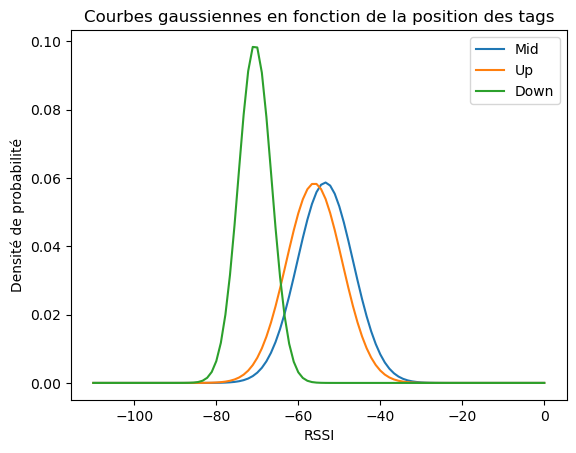

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Diviser les données en trois ensembles en fonction de la position (mid, up ou down)
donnees_mid = ana[ana['slice_id_IN'].str.contains('mid')]['in_IN']
donnees_up = ana[ana['slice_id_IN'].str.contains('up')]['in_IN']
donnees_down = ana[ana['slice_id_IN'].str.contains('down')]['in_IN']

# Calculer les moyennes et les écarts-types pour chaque ensemble
moyenne_mid = donnees_mid.mean()
ecart_type_mid = donnees_mid.std()

moyenne_up = donnees_up.mean()
ecart_type_up = donnees_up.std()

moyenne_down = donnees_down.mean()
ecart_type_down = donnees_down.std()

# Générer des données pour les courbes gaussiennes
x = np.linspace(-110, 0, 100)  # Plage typique de valeurs RSSI
y_mid = norm.pdf(x, moyenne_mid, ecart_type_mid)
y_up = norm.pdf(x, moyenne_up, ecart_type_up)
y_down = norm.pdf(x, moyenne_down, ecart_type_down)

# Tracer les courbes gaussiennes
plt.plot(x, y_mid, label='Mid')
plt.plot(x, y_up, label='Up')
plt.plot(x, y_down, label='Down')

# Ajouter des légendes et des titres
plt.legend()
plt.xlabel('RSSI')
plt.ylabel('Densité de probabilité')
plt.title('Courbes gaussiennes en fonction de la position des tags')

# Afficher le graphique
plt.show()
